In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report, precision_score



In [2]:
df = pd.read_csv('Breast_Cancer.csv')

In [3]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [ ]:
#df.drop_duplicates(inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [8]:
df.describe(include = "object").T

,count,unique,top,freq
Race,4024,3,White,3413
Marital Status,4024,5,Married,2643
T Stage,4024,4,T2,1786
N Stage,4024,3,N1,2732
6th Stage,4024,5,IIA,1305
differentiate,4024,4,Moderately differentiated,2351
Grade,4024,4,2,2351
A Stage,4024,2,Regional,3932
Estrogen Status,4024,2,Positive,3755
Progesterone Status,4024,2,Positive,3326


In [9]:
df.Status.unique()


array(['Alive', 'Dead'], dtype=object)

In [10]:
df.Status = [1 if each == "Alive" else 0 for each in df.Status]

In [11]:
df["Progesterone Status"].unique()


array(['Positive', 'Negative'], dtype=object)

In [12]:
df["Progesterone Status"] = [1 if each == "Positive" else 0 for each in df["Progesterone Status"]]


In [13]:
df["Estrogen Status"].unique()


array(['Positive', 'Negative'], dtype=object)

In [14]:
df["Estrogen Status"] = [1 if each == "Positive" else 0 for each in df["Estrogen Status"]]


In [15]:
df["A Stage"].unique()


array(['Regional', 'Distant'], dtype=object)

In [16]:
df["A Stage"] = [1 if each == "Regional" else 0 for each in df["A Stage"]]


In [17]:
df["6th Stage"].unique()


array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [18]:
df['6th Stage'] = [0 if each == "IIA" else 1 if each =='IIIA' else 2 if each =='IIIC' else 3 if each =='IIB'  else 4 for each in df['6th Stage']]


In [19]:
df['6th Stage'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [20]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [21]:
df['Marital Status'] = [0 if each == 'Married' else 1 if each =='Divorced' or each =='Separated' or each =='Widowed' else 2 for each in df['Marital Status']]
#df['Marital Status'] = [0 if each == 'Married' else 1 if each =='Divorced' else 2 if each =='Single ' else 3 if each =='Widowed'  else 4 for each in df['Marital Status']]


In [27]:
df['Race'].unique()


array([0, 1, 2], dtype=int64)

In [26]:
df['Race'] = [0 if each == 'White' else 1 if each =='Black'  else 2 for each in df['Race']]


In [32]:
df['T Stage '].unique()


array([0, 1, 2, 3], dtype=int64)

In [31]:
df['T Stage '] = [0 if each == 'T1' else 1 if each =='T2' else 2 if each =='T3'   else 3 for each in df['T Stage ']]


In [36]:
df['N Stage'].unique()


array([0, 1, 2], dtype=int64)

In [35]:
df['N Stage'] = [0 if each == 'N1' else 1 if each =='N2'  else 2 for each in df['N Stage']]


In [40]:
df['differentiate'].unique()


array([0, 1, 2, 3], dtype=int64)

In [39]:
df['differentiate'] = [0 if each == 'Poorly differentiated' else 1 if each =='Moderately differentiated' else 2 if each =='Well differentiated'   else 3 for each in df['differentiate']]


In [47]:
df['Grade'].unique()


array([3, 2, 1], dtype=int64)

In [46]:
df['Grade'] = [1 if each == '1' else 2 if each =='2'  else 3 for each in df['Grade']]


In [48]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,0,0,0,0,0,3,1,4,1,1,24,1,60,1
1,50,0,0,1,1,1,1,2,1,35,1,1,14,5,62,1
2,58,0,1,2,2,2,1,2,1,63,1,1,14,7,75,1
3,58,0,0,0,0,0,0,3,1,18,1,1,2,1,84,1
4,47,0,0,1,0,3,0,3,1,41,1,1,3,1,50,1


In [49]:
df.info()
cat_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

In [61]:
cat_data= df.drop(["Survival Months",'Reginol Node Positive','Regional Node Examined','Tumor Size','Age'] ,axis = 1)
cat_data.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,0,0,0,0,0,0,3,1,1,1,1
1,0,0,1,1,1,1,2,1,1,1,1
2,0,1,2,2,2,1,2,1,1,1,1
3,0,0,0,0,0,0,3,1,1,1,1
4,0,0,1,0,3,0,3,1,1,1,1


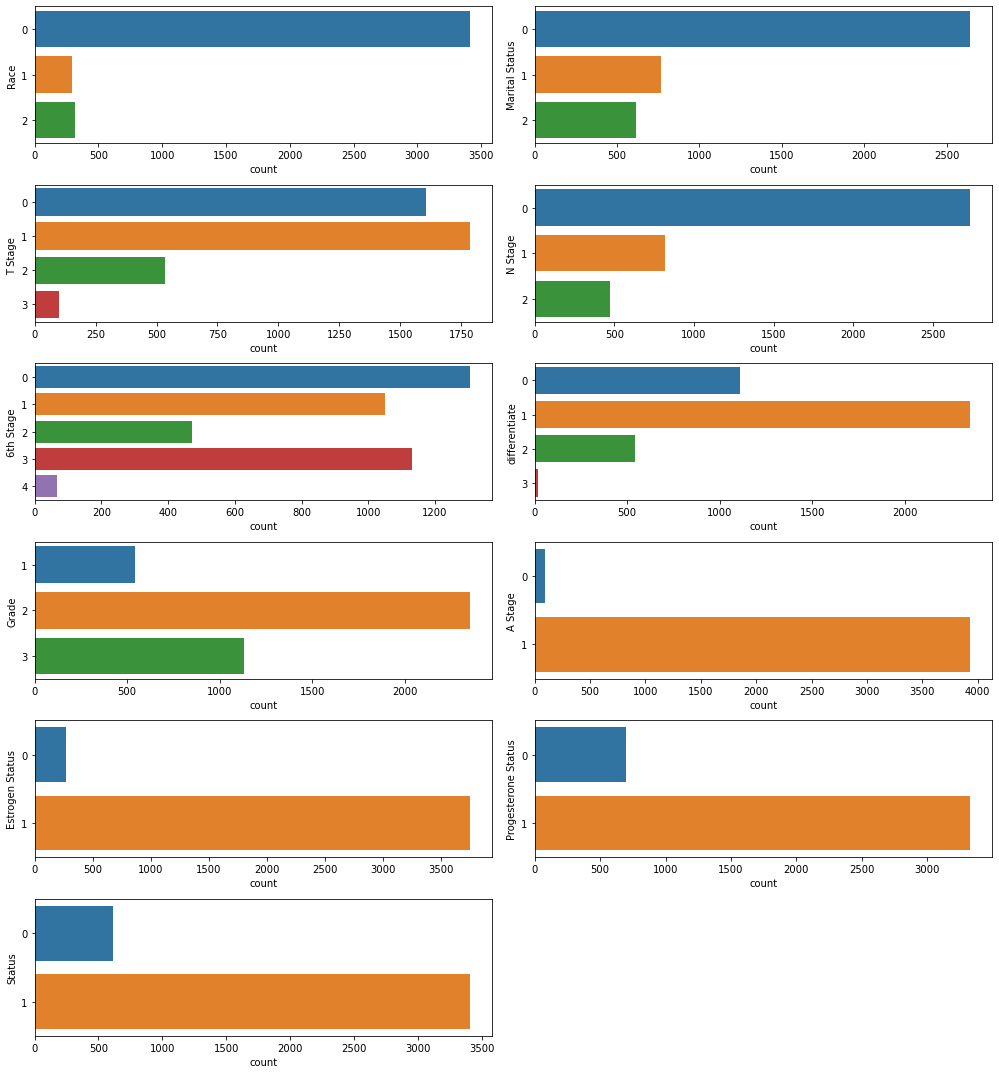

In [62]:
plt.figure(figsize=(14,27))
for i, col in enumerate(cat_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.countplot(y=cat_data[col])
plt.tight_layout()
plt.show()

In [76]:
num_data= df.drop(["Race",'Marital Status','T Stage ','A Stage','N Stage','6th Stage','differentiate','Grade','Estrogen Status','Progesterone Status','Status'] ,axis = 1)
num_data.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50


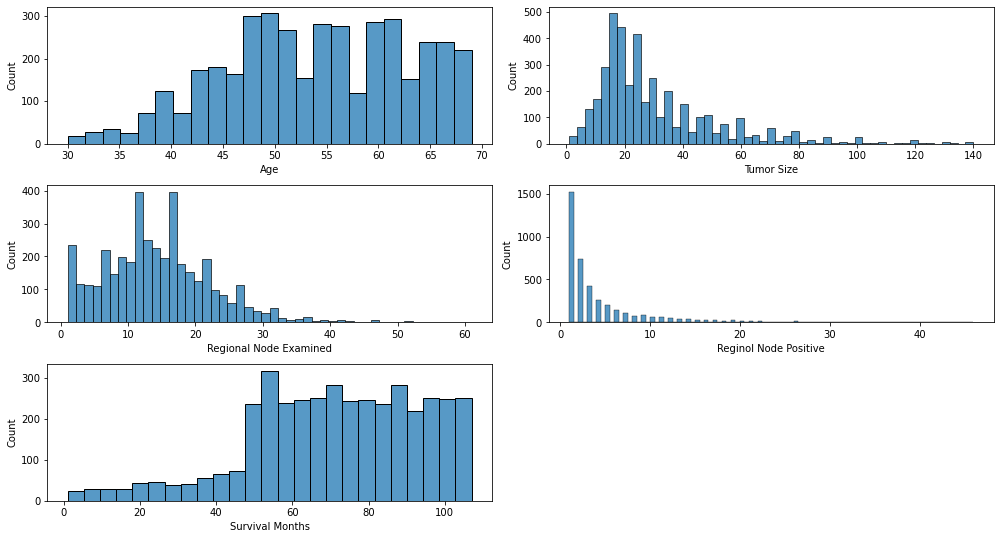

In [77]:
plt.figure(figsize=(14,27))
for i, col in enumerate(num_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.histplot(x=num_data[col])
plt.tight_layout()
plt.show()


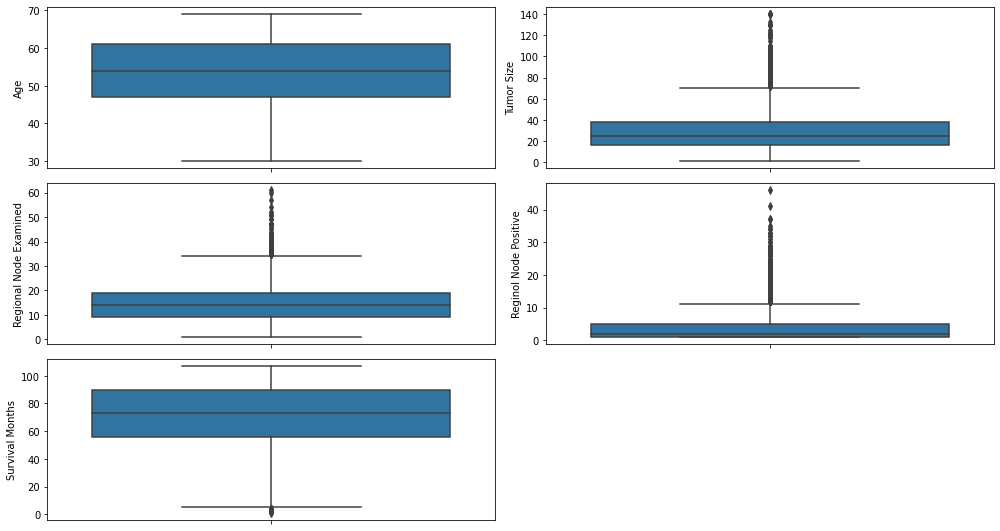

In [78]:
plt.figure(figsize=(14,27))
for i, col in enumerate(num_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.boxplot(y=num_data[col])
plt.tight_layout()
plt.show()

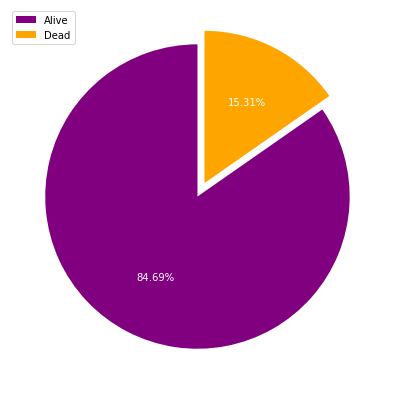

In [59]:
Status = ['Alive', 'Dead']
s = df.Status.value_counts()
color = ['purple', 'orange']

plt.figure(figsize = (10, 7))
plt.pie(s, labels = Status, colors = color, explode = (0, 0.1), textprops = {'color':"w"}, autopct = "%.2f%%",startangle = 90)

plt.legend()

plt.show();

In [63]:
df.groupby(["Race"])["Status"].value_counts()

Race  Status
0     1         2903
      0          510
1     1          218
      0           73
2     1          287
      0           33
Name: Status, dtype: int64

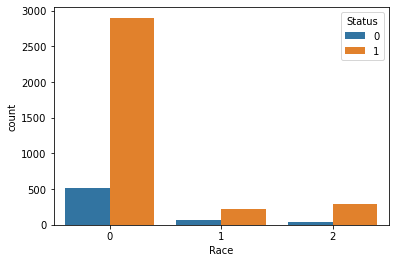

In [64]:
sns.countplot(x = "Race", hue = "Status", data = df);

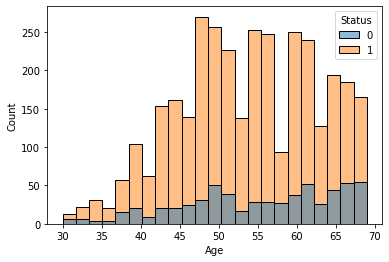

In [80]:
sns.histplot(x = "Age", hue = "Status", data = df);

In [65]:
df.groupby(["Marital Status"])["Status"].value_counts()

Marital Status  Status
0               1         2285
                0          358
1               1          612
                0          154
2               1          511
                0          104
Name: Status, dtype: int64

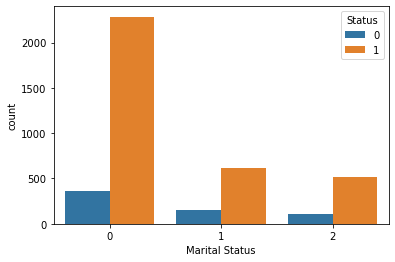

In [66]:
sns.countplot(x = "Marital Status", hue = "Status", data = df);

In [68]:
df.groupby(["Estrogen Status"])["Status"].value_counts()
#Estrogen Status	Progesterone Status

Progesterone Status  Status
0                    1          494
                     0          204
1                    1         2914
                     0          412
Name: Status, dtype: int64

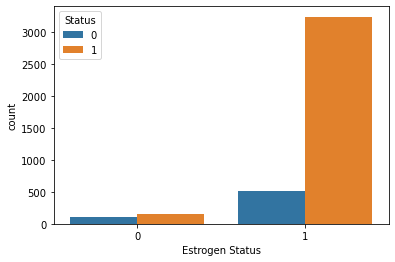

In [69]:
sns.countplot(x = "Estrogen Status", hue = "Status", data = df);

In [70]:
df.groupby(["Progesterone Status"])["Status"].value_counts()


Progesterone Status  Status
0                    1          494
                     0          204
1                    1         2914
                     0          412
Name: Status, dtype: int64

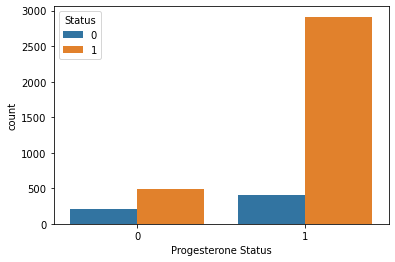

In [71]:
sns.countplot(x = "Progesterone Status", hue = "Status", data = df);

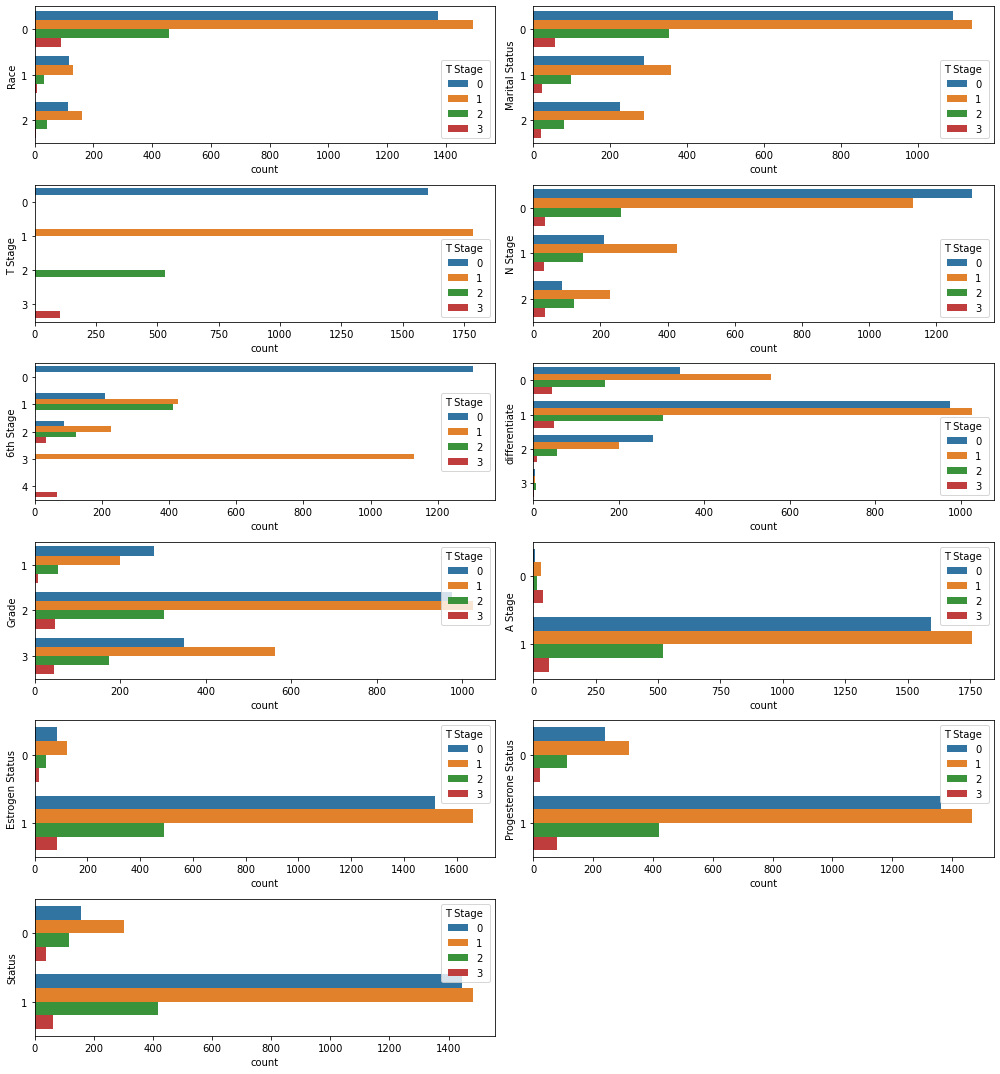

In [81]:
plt.figure(figsize=(14,27))
for i, col in enumerate(cat_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.countplot(y=cat_data[col], hue=cat_data['T Stage '])
plt.tight_layout()
plt.show()


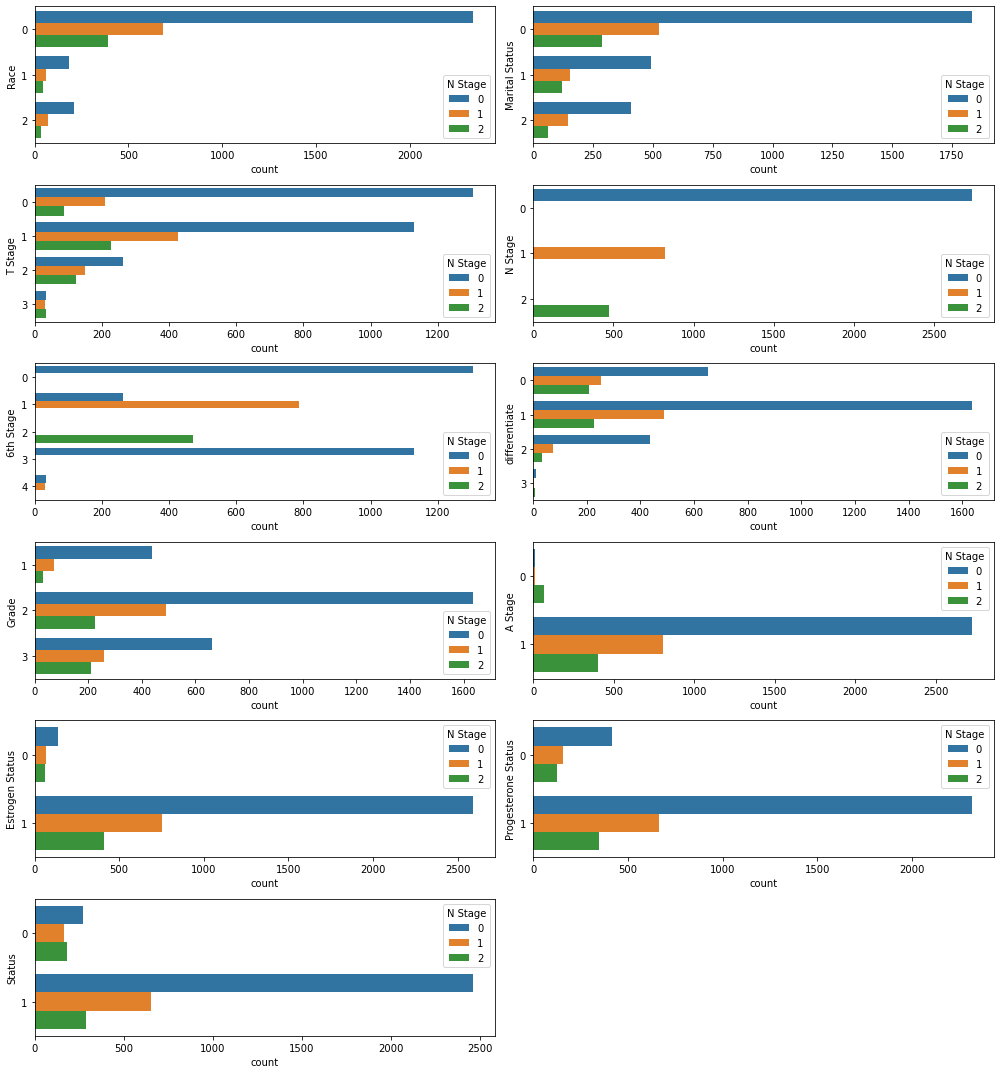

In [82]:
plt.figure(figsize=(14,27))
for i, col in enumerate(cat_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.countplot(y=cat_data[col], hue=cat_data['N Stage'])
plt.tight_layout()
plt.show()

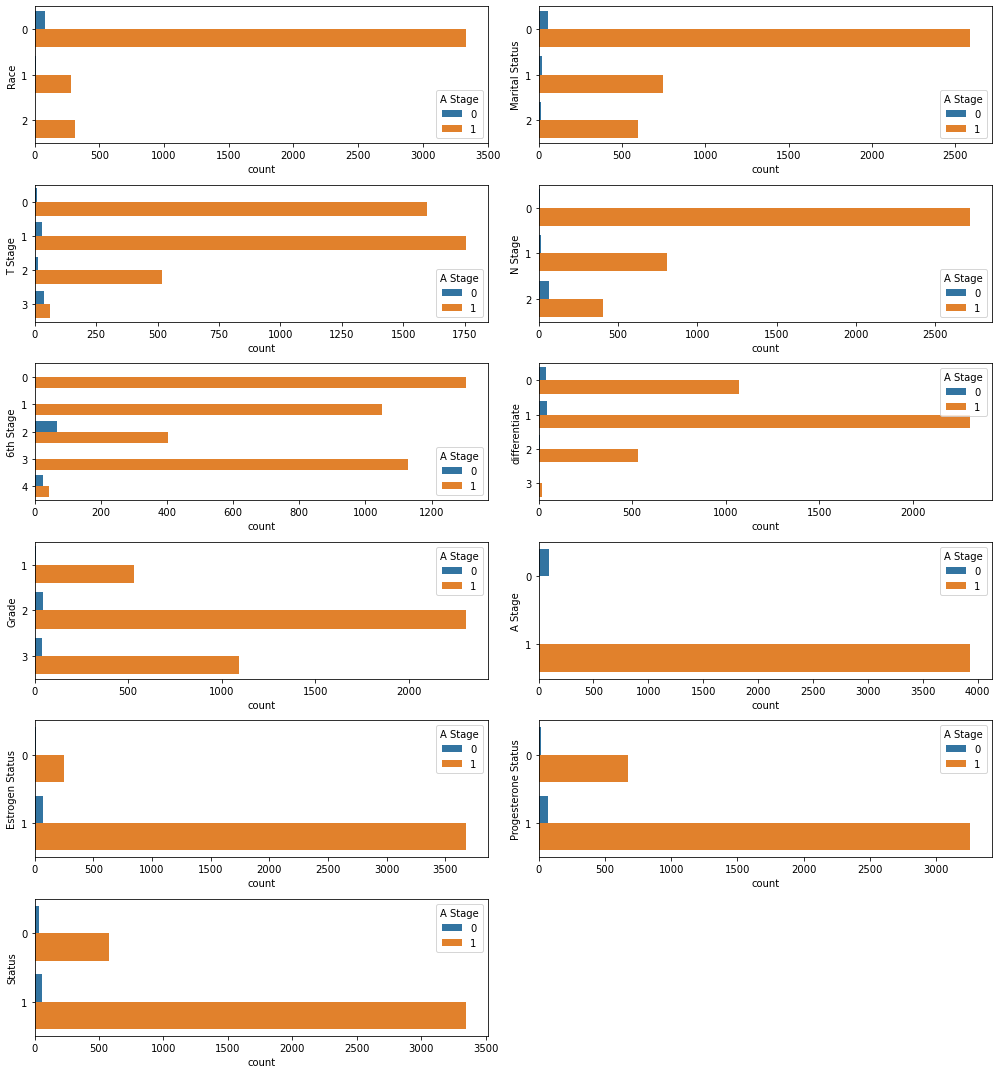

In [83]:
plt.figure(figsize=(14,27))
for i, col in enumerate(cat_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.countplot(y=cat_data[col], hue=cat_data['A Stage'])
plt.tight_layout()
plt.show()


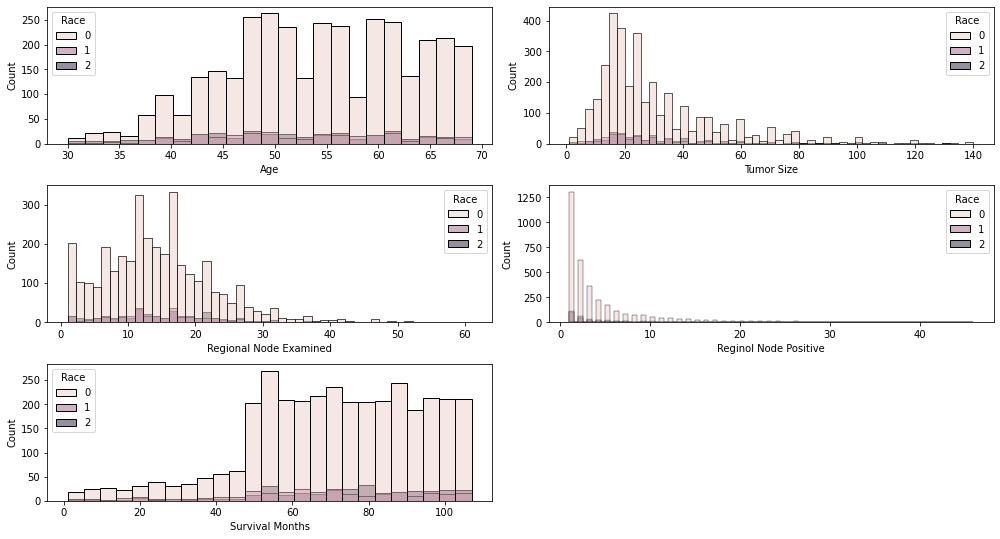

In [84]:
plt.figure(figsize=(14,27))
for i, col in enumerate(num_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.histplot(x=num_data[col], hue=df['Race'])
plt.tight_layout()
plt.show()

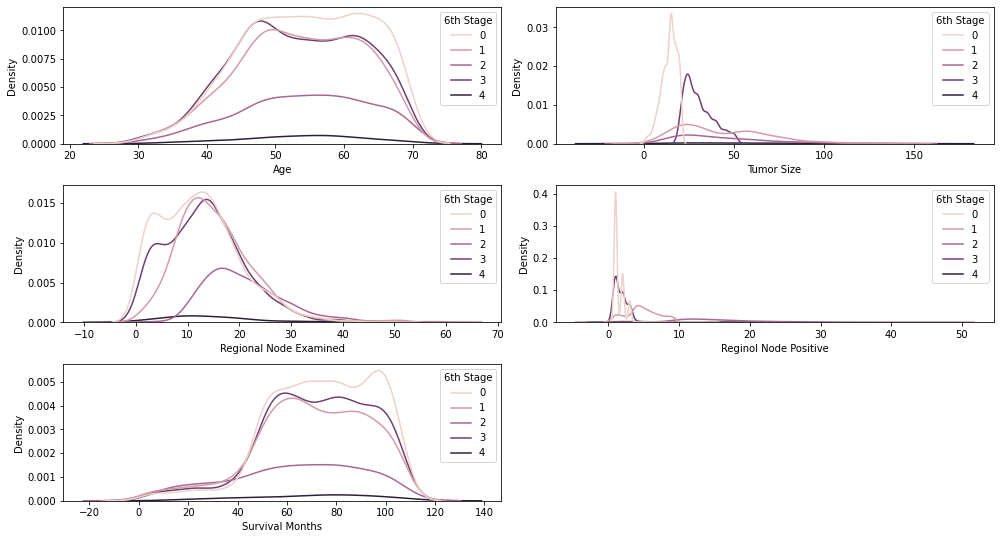

In [85]:
plt.figure(figsize=(14,27))
for i, col in enumerate(num_data.columns):
    axes = plt.subplot(11,2, i + 1)
    sns.kdeplot(x=num_data[col], hue=df['6th Stage'])
plt.tight_layout()
plt.show()

# ML MODEL

In [86]:
y = df.Status
x = df.drop('Status', axis=1)

In [89]:
sampler = SMOTE()

In [90]:
x, y = sampler.fit_resample(x,y)

<AxesSubplot:ylabel='Status'>

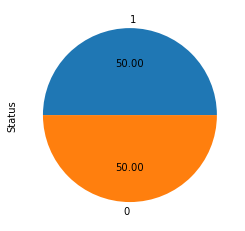

In [91]:
y.value_counts().plot.pie(autopct='%.2f')

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, stratify=y)


In [94]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(5452, 15)
(5452,)
(1364, 15)
(1364,)


In [105]:
def model_classification(x_train,x_test,y_train, y_test, n,kn): 
    classifiers = {
        'Random Forest':RandomForestClassifier(n_estimators=n),
        'KNN':KNeighborsClassifier(kn),
        'SVC':SVC(kernel='linear')
    }
    models = []
    for model_x, model in classifiers.items():
        print('-'*5, model_x,'-'*5)

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        print('Train Score:', model.score(x_train, y_train))
        print('Test Score:', model.score(x_test, y_test))
        print()
        print('Accuracy:', accuracy_score(y_test, y_pred))

        print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
        print()
        print(classification_report(y_test, y_pred))
        acc = model_x,model.score(x_test, y_test),precision_score(y_test, y_pred),f1_score(y_test, y_pred),recall_score(y_test, y_pred)
        models.append(acc)
        table = pd.DataFrame(models, columns=['Model','Score','Precision','F1_Score','Recall'])
        
        print('*'*20)
        
        
    display(table.sort_values('Score', ascending=False))


In [106]:
pred = model_classification(x_train,x_test,y_train, y_test, 100,7)
display(pred)

----- Random Forest -----
Train Score: 1.0
Test Score: 0.9296187683284457

Accuracy: 0.9296187683284457
Confusion Matrix
 [[635  47]
 [ 49 633]]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       682
           1       0.93      0.93      0.93       682

    accuracy                           0.93      1364
   macro avg       0.93      0.93      0.93      1364
weighted avg       0.93      0.93      0.93      1364

********************
----- KNN -----
Train Score: 0.8969185619955979
Test Score: 0.8621700879765396

Accuracy: 0.8621700879765396
Confusion Matrix
 [[650  32]
 [156 526]]

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       682
           1       0.94      0.77      0.85       682

    accuracy                           0.86      1364
   macro avg       0.87      0.86      0.86      1364
weighted avg       0.87      0.86      0.86      1364

********************
----- S

,Model,Score,Precision,F1_Score,Recall
0,Random Forest,0.929619,0.930882,0.929515,0.928152
1,KNN,0.862170,0.942652,0.848387,0.771261
2,SVC,0.846774,0.814077,0.854355,0.898827


None